<h1>CNN modeli za prepoznavanje šalica</h1>
<hr/>
<h2>Model Delta</h2>
<p>Testovi sa smanjenom kompleksnosti modela</p>
<p> Set slika je 700/100, dodavanje Dropot-a i Data Augmentation</p>

<p>Uvoženje potrebnih modula:</p>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
import numpy as np

<p>Postavljanje direktorija sa trening i validacijskim slikama:</p>

In [3]:
# Postavi direktorije slika
train_dir = "../../Projekt_slike_128/Trening"
test_dir = "../../Projekt_slike_128/Validacija"

<p>Odabir broja epoha i veličine batch-eva:</p>

In [26]:
# Odredi broj epoha i veličinu batcheva
num_of_epochs = input("Number of epochs:")
num_of_epochs = int(num_of_epochs)
size_of_batch = input("Batch size:")
size_of_batch = int(size_of_batch)

Number of epochs: 100
Batch size: 128


<p>Generiranje podataka:</p>

In [27]:
# Generator podataka sa augmentacijom za trening
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


<p>Prikaz random slika iz svake klase:</p>

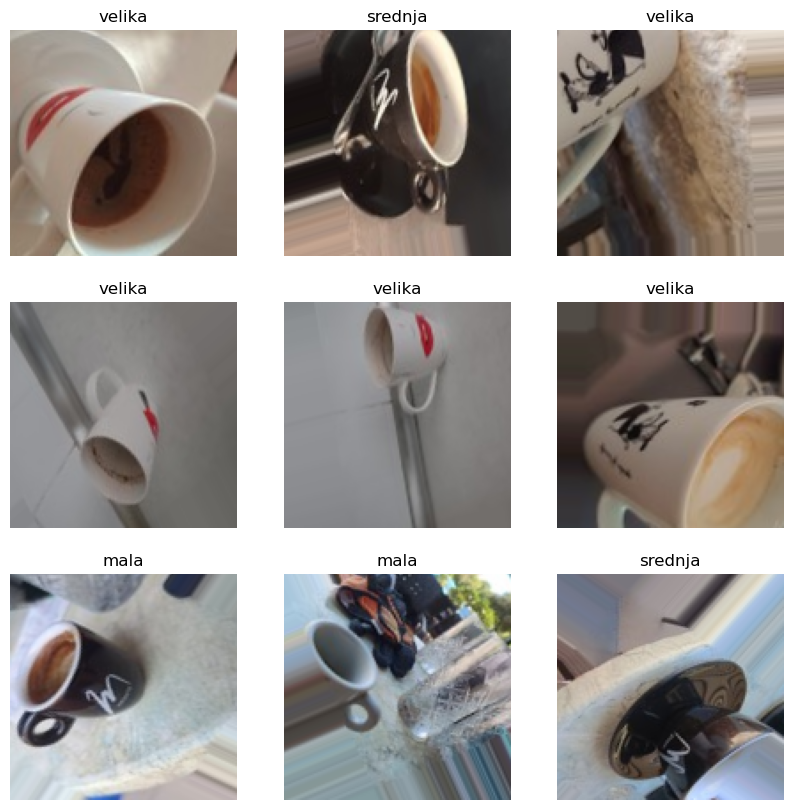

In [6]:
# Primjeri slika
def display_sample_images(generator):
    x, y = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        
        if (np.argmax(y[i])==0):
            plt.title("mala")
        if (np.argmax(y[i])==1):
            plt.title("srednja")
        if (np.argmax(y[i])==2):
            plt.title("velika")
        plt.axis("off")
    plt.show()


display_sample_images(train_generator)

<h3>MOdel E.1</h3>

In [18]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 30, 30, 16)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:50</p>
<p>veličina batcheva: 64</p>

In [19]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-15 13:31:47.060754: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 34s 847ms/step - loss: 1.8276 - accuracy: 0.3212 - val_loss: 1.0989 - val_accuracy: 0.2734
Epoch 2/50
32/32 [==============================] - 28s 858ms/step - loss: 1.0966 - accuracy: 0.3502 - val_loss: 1.0986 - val_accuracy: 0.2812
Epoch 3/50
32/32 [==============================] - 28s 862ms/step - loss: 1.0960 - accuracy: 0.3492 - val_loss: 1.0988 - val_accuracy: 0.3320
Epoch 4/50
32/32 [==============================] - 28s 859ms/step - loss: 1.0937 - accuracy: 0.3728 - val_loss: 1.0988 - val_accuracy: 0.3320
Epoch 5/50
32/32 [==============================] - 28s 862ms/step - loss: 1.0934 - accuracy: 0.3585 - val_loss: 1.0988 - val_accuracy: 0.3008
Epoch 6/50
32/32 [==============================] - 28s 861ms/step - loss: 1.0801 - accuracy: 0.3895 - val_loss: 1.1075 - val_accuracy: 0.3555
Epoch 7/50
32/32 [==============================] - 28s 864ms/step - loss: 1.0394 - accuracy: 0.4553 - val_loss: 1.1066 - val_accuracy: 0.3789
Epoch 8/50

<hr/>
<h4>Evaluacija modela E.1</h4>
<p>Trening i Validacija - točnost i gubitak</p>

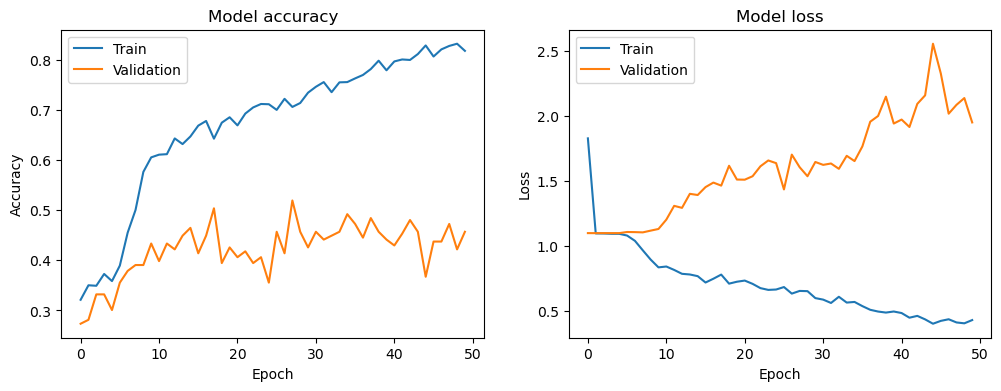

4/4 [==============================] - 1s 129ms/step - loss: 2.1365 - accuracy: 0.4570
Test accuracy: 0.45703125


In [20]:

# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2>Model E.2</h2>
<p>50 epoha , batch 64, dodan još jedan Dense layer(128)</p>

In [18]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(128, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 30, 30, 16)       

In [14]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-16 19:14:14.528275: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 30s 754ms/step - loss: 1.3852 - accuracy: 0.3394 - val_loss: 1.1000 - val_accuracy: 0.3164
Epoch 2/50
32/32 [==============================] - 25s 770ms/step - loss: 1.0961 - accuracy: 0.3482 - val_loss: 1.1018 - val_accuracy: 0.2773
Epoch 3/50
32/32 [==============================] - 24s 756ms/step - loss: 1.0961 - accuracy: 0.3541 - val_loss: 1.1016 - val_accuracy: 0.3125
Epoch 4/50
32/32 [==============================] - 25s 767ms/step - loss: 1.0876 - accuracy: 0.3895 - val_loss: 1.1090 - val_accuracy: 0.2461
Epoch 5/50
32/32 [==============================] - 25s 773ms/step - loss: 1.0727 - accuracy: 0.4263 - val_loss: 1.1267 - val_accuracy: 0.1211
Epoch 6/50
32/32 [==============================] - 24s 756ms/step - loss: 1.0577 - accuracy: 0.4371 - val_loss: 1.1258 - val_accuracy: 0.3359
Epoch 7/50
32/32 [==============================] - 25s 761ms/step - loss: 1.0506 - accuracy: 0.4258 - val_loss: 1.1568 - val_accuracy: 0.2031
Epoch 8/50

<hr/>
<h3>Plotovi i Evaluacija E.2</h3>

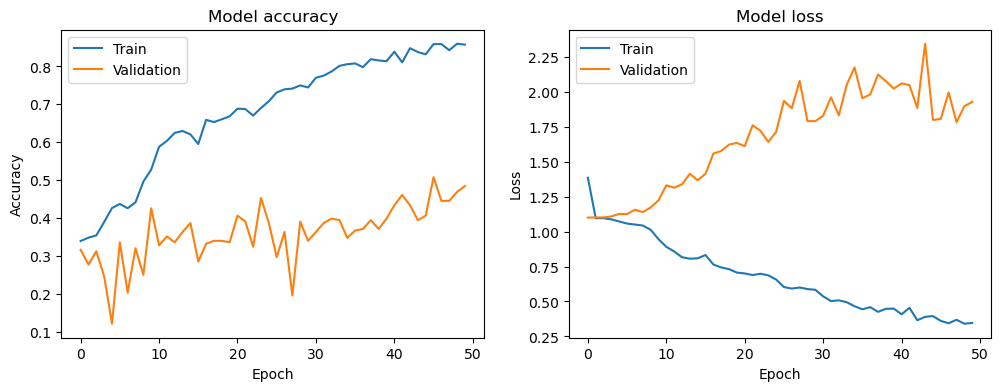

4/4 [==============================] - 1s 126ms/step - loss: 1.8115 - accuracy: 0.4688
Test accuracy: 0.46875


In [15]:

# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h3>Model E.3</h3>
<p>istovjetan modelu E.2 ali na 100 epoha</p>

<p>Kompajliranje i treniranje:</p>
<p>batch size: 64</p>
<p>broj epoha:100</p>

In [19]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-16 19:43:15.092606: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 30s 751ms/step - loss: 1.3715 - accuracy: 0.3364 - val_loss: 1.0987 - val_accuracy: 0.3203
Epoch 2/100
32/32 [==============================] - 24s 756ms/step - loss: 1.0954 - accuracy: 0.3694 - val_loss: 1.0992 - val_accuracy: 0.3242
Epoch 3/100
32/32 [==============================] - 25s 763ms/step - loss: 1.0886 - accuracy: 0.3806 - val_loss: 1.1019 - val_accuracy: 0.3281
Epoch 4/100
32/32 [==============================] - 25s 767ms/step - loss: 1.0461 - accuracy: 0.4332 - val_loss: 1.1321 - val_accuracy: 0.3828
Epoch 5/100
32/32 [==============================] - 25s 766ms/step - loss: 0.9851 - accuracy: 0.4882 - val_loss: 1.1526 - val_accuracy: 0.3594
Epoch 6/100
32/32 [==============================] - 25s 763ms/step - loss: 0.9322 - accuracy: 0.5275 - val_loss: 1.2582 - val_accuracy: 0.3438
Epoch 7/100
32/32 [==============================] - 25s 773ms/step - loss: 0.8739 - accuracy: 0.5781 - val_loss: 1.3267 - val_accuracy: 0.3477
Epoc

<h3>Plotovi i evaluacija:</h3>
<p>Točnost i gubitak treninga i validacije</p>

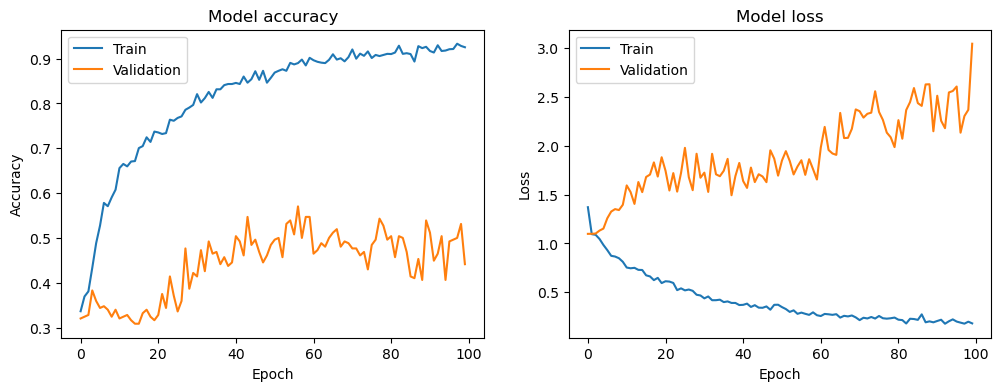

4/4 [==============================] - 1s 136ms/step - loss: 2.8636 - accuracy: 0.4375
Test accuracy: 0.4375


In [20]:
# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h3>MOdel E.4</h3>
<p>povećanje batch_size na 128, skinut dodatni dense layer</p>


In [11]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 8)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 16)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:50</p>
<p>veličina batcheva: 128</p>

In [12]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-15 13:01:29.842929: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 31s 2s/step - loss: 4.2911 - accuracy: 0.3372 - val_loss: 1.0976 - val_accuracy: 0.3320
Epoch 2/50
16/16 [==============================] - 27s 2s/step - loss: 1.0988 - accuracy: 0.3322 - val_loss: 1.0982 - val_accuracy: 0.3359
Epoch 3/50
16/16 [==============================] - 28s 2s/step - loss: 1.0973 - accuracy: 0.3320 - val_loss: 1.0982 - val_accuracy: 0.5664
Epoch 4/50
16/16 [==============================] - 27s 2s/step - loss: 1.0964 - accuracy: 0.3347 - val_loss: 1.0985 - val_accuracy: 0.3398
Epoch 5/50
16/16 [==============================] - 28s 2s/step - loss: 1.0967 - accuracy: 0.3337 - val_loss: 1.0983 - val_accuracy: 0.3516
Epoch 6/50
16/16 [==============================] - 27s 2s/step - loss: 1.0962 - accuracy: 0.3377 - val_loss: 1.0988 - val_accuracy: 0.3203
Epoch 7/50
16/16 [==============================] - 27s 2s/step - loss: 1.0964 - accuracy: 0.3327 - val_loss: 1.0986 - val_accuracy: 0.3320
Epoch 8/50
16/16 [=============

<hr/>
<p>Evaluacija modela</p>
<p>točnost i gubitak</p>

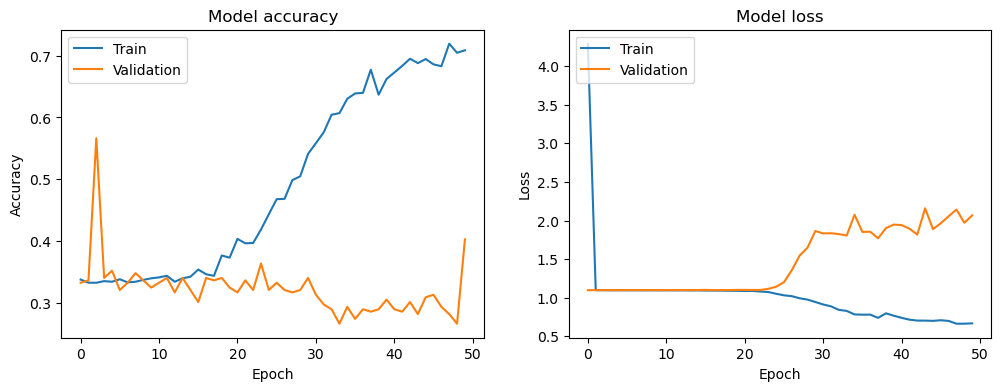

2/2 [==============================] - 1s 262ms/step - loss: 2.0211 - accuracy: 0.4023
Test accuracy: 0.40234375


In [13]:


# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h3>MOdel E.5</h3>
<p>povećanje batch_size na 128, smanjen broj epoha na 20</p>

In [23]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 63, 63, 8)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 30, 30, 16)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 128</p>

In [25]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20


2024-08-15 14:30:44.166712: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 32s 2s/step - loss: 3.7027 - accuracy: 0.3458 - val_loss: 1.0985 - val_accuracy: 0.4258
Epoch 2/20
16/16 [==============================] - 27s 2s/step - loss: 1.0972 - accuracy: 0.3428 - val_loss: 1.0985 - val_accuracy: 0.3359
Epoch 3/20
16/16 [==============================] - 27s 2s/step - loss: 1.0975 - accuracy: 0.3387 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 4/20
16/16 [==============================] - 27s 2s/step - loss: 1.0984 - accuracy: 0.3332 - val_loss: 1.0984 - val_accuracy: 0.3398
Epoch 5/20
16/16 [==============================] - 28s 2s/step - loss: 1.0971 - accuracy: 0.3494 - val_loss: 1.0984 - val_accuracy: 0.3320
Epoch 6/20
16/16 [==============================] - 27s 2s/step - loss: 1.0964 - accuracy: 0.3443 - val_loss: 1.0986 - val_accuracy: 0.3359
Epoch 7/20
16/16 [==============================] - 28s 2s/step - loss: 1.0956 - accuracy: 0.3555 - val_loss: 1.0991 - val_accuracy: 0.3125
Epoch 8/20
16/16 [=============

<h4>Evaluacija modela:</h4>

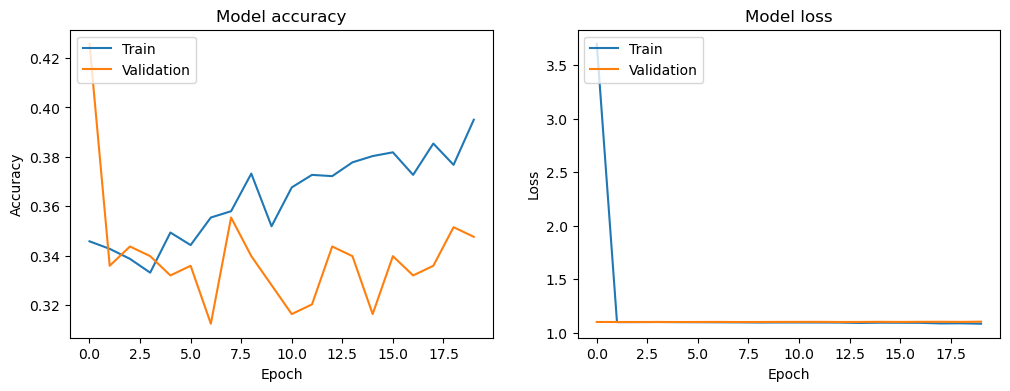

2/2 [==============================] - 1s 265ms/step - loss: 1.1012 - accuracy: 0.3359
Test accuracy: 0.3359375


In [26]:

# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h3>MOdel E.6</h3>
<p>batch_size 128, epochs 50, dodan dense layer (128)</p>

In [28]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(128, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 8)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 30, 30, 16)       

<p>Kompajliranje i trening</p>
<p>batch_size:128</p>
<p>epochs:50</p>

In [24]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-16 20:45:20.363564: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 32s 1s/step - loss: 2.4805 - accuracy: 0.3327 - val_loss: 1.0999 - val_accuracy: 0.3203
Epoch 2/50
16/16 [==============================] - 24s 1s/step - loss: 1.1016 - accuracy: 0.3327 - val_loss: 1.0988 - val_accuracy: 0.3320
Epoch 3/50
16/16 [==============================] - 24s 1s/step - loss: 1.0980 - accuracy: 0.3392 - val_loss: 1.0991 - val_accuracy: 0.3281
Epoch 4/50
16/16 [==============================] - 24s 1s/step - loss: 1.0949 - accuracy: 0.3590 - val_loss: 1.1000 - val_accuracy: 0.3320
Epoch 5/50
16/16 [==============================] - 24s 1s/step - loss: 1.0947 - accuracy: 0.3646 - val_loss: 1.0992 - val_accuracy: 0.3438
Epoch 6/50
16/16 [==============================] - 24s 1s/step - loss: 1.0930 - accuracy: 0.3692 - val_loss: 1.1018 - val_accuracy: 0.3281
Epoch 7/50
16/16 [==============================] - 24s 2s/step - loss: 1.0906 - accuracy: 0.3707 - val_loss: 1.1009 - val_accuracy: 0.3359
Epoch 8/50
16/16 [=============

<hr/>
<h4>Evaluacija modela:</h4>
<p>Trening i validacija - točnost i gubitak</p>

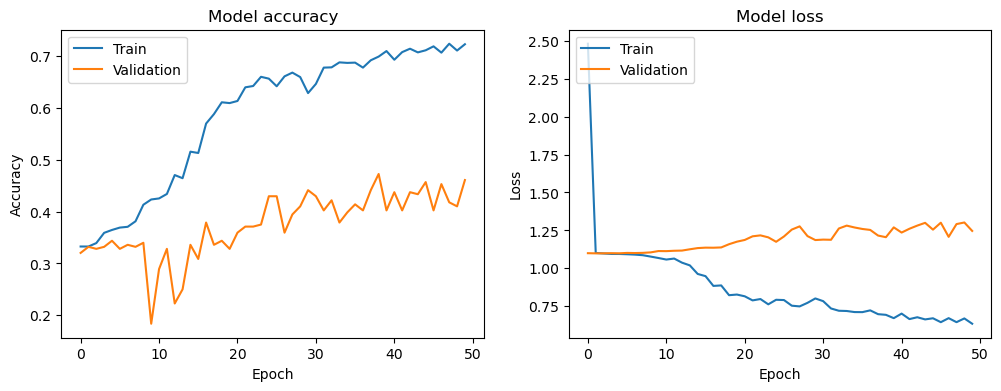

2/2 [==============================] - 1s 233ms/step - loss: 1.2274 - accuracy: 0.4688
Test accuracy: 0.46875


In [25]:

# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h3>MOdel E.6</h3>
<p>batch_size 128, epochs 100, dodan dense layer (128)</p>
<p> kao model E.5 ali an 100 epoha</p>

In [29]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-16 21:23:02.153420: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 29s 1s/step - loss: 1.9480 - accuracy: 0.3316 - val_loss: 1.0991 - val_accuracy: 0.2969
Epoch 2/100
16/16 [==============================] - 24s 1s/step - loss: 1.1054 - accuracy: 0.3540 - val_loss: 1.0989 - val_accuracy: 0.3711
Epoch 3/100
16/16 [==============================] - 24s 1s/step - loss: 1.0978 - accuracy: 0.3479 - val_loss: 1.0996 - val_accuracy: 0.3320
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 1.0926 - accuracy: 0.3818 - val_loss: 1.0997 - val_accuracy: 0.3164
Epoch 5/100
16/16 [==============================] - 24s 1s/step - loss: 1.0935 - accuracy: 0.3631 - val_loss: 1.1008 - val_accuracy: 0.3164
Epoch 6/100
16/16 [==============================] - 24s 1s/step - loss: 1.0920 - accuracy: 0.3651 - val_loss: 1.1008 - val_accuracy: 0.3281
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 1.0861 - accuracy: 0.4004 - val_loss: 1.1001 - val_accuracy: 0.3398
Epoch 8/100
16/16 [======

<hr/>
<h4>Evaluacija modela:</h4>
<p>Trening i validacija - točnost i gubitak</p>

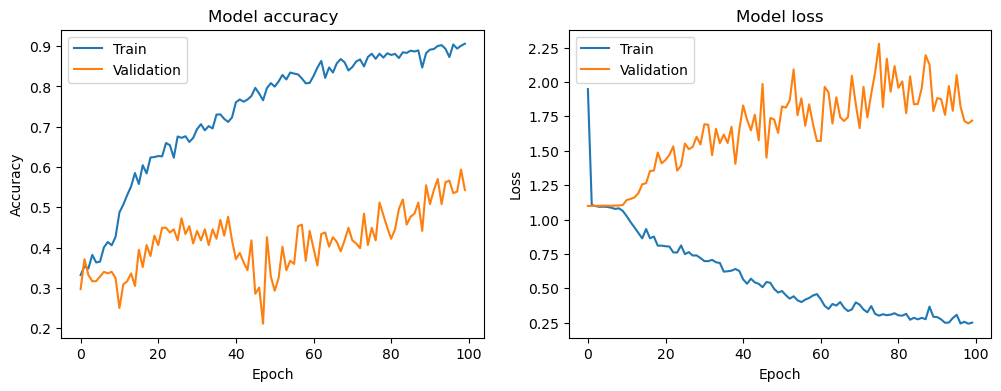

2/2 [==============================] - 1s 284ms/step - loss: 1.5869 - accuracy: 0.5430
Test accuracy: 0.54296875


In [30]:
# Plot trening i evaluacija - točnost
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot trening i validacija - gubitak
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h3>Zaključak</h3>
<p>Učenje na treningu je usporeno, u sljedećoj iteraciji isprobati regularizaciju (L2)</p>
<p>na najuspješnijeoj verziji sa batchsize 64 i 128</p>